In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
data_dir = 'garbage'
sets = ['train', 'test']

In [31]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(150, 300))])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, sets[0]),transform=data_transform)

In [32]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=False)

In [33]:
train_loader.__dir__()

['dataset',
 'num_workers',
 'prefetch_factor',
 'pin_memory',
 'pin_memory_device',
 'timeout',
 'worker_init_fn',
 '_DataLoader__multiprocessing_context',
 '_dataset_kind',
 'batch_size',
 'drop_last',
 'sampler',
 'batch_sampler',
 'generator',
 'collate_fn',
 'persistent_workers',
 '_DataLoader__initialized',
 '_IterableDataset_len_called',
 '_iterator',
 '__module__',
 '__annotations__',
 '__doc__',
 '__init__',
 '_get_iterator',
 'multiprocessing_context',
 '__setattr__',
 '__iter__',
 '_auto_collation',
 '_index_sampler',
 '__len__',
 'check_worker_number_rationality',
 '__orig_bases__',
 '__dict__',
 '__weakref__',
 '__parameters__',
 '__slots__',
 '_is_protocol',
 '__class_getitem__',
 '__init_subclass__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [34]:
train_loader.dataset.classes

['PET',
 'books_and_paper',
 'burnable',
 'cans',
 'cardboard',
 'clothes',
 'danger',
 'glass_bin',
 'metal',
 'nonburn',
 'plastic']

In [35]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 150, 300])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


Text(0.5, 1.0, 'Training Image Sample')

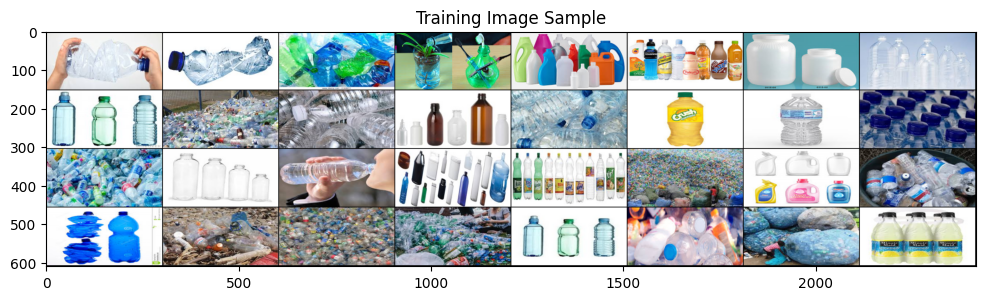

In [36]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels)
plt.figure(figsize=(12,6))
imshow(torchvision.utils.make_grid(images))
plt.title('Training Image Sample')

In [37]:
num_batches = len(train_loader)

In [50]:
dataset_mean = 0
dataset_std = 0

In [51]:
i = 0
for images, _ in train_loader:
    if i % 20 == 0:
        print(f'Working on batch {i+1}')
    num_batch_samples = images.size(0)
    images = images.view(num_batch_samples, images.size(1), -1)
    dataset_mean += images.mean(2).sum(0)
    #print(images.mean(2))
    dataset_std += images.std(2).sum(0)
    i += 1

dataset_mean /= len(train_loader.dataset)
dataset_std /= len(train_loader.dataset)

Working on batch 1
Working on batch 21
Working on batch 41
Working on batch 61
Working on batch 81
Working on batch 101
Working on batch 121
Working on batch 141
Working on batch 161
Working on batch 181
Working on batch 201
Working on batch 221
Working on batch 241
Working on batch 261
Working on batch 281
Working on batch 301
Working on batch 321
Working on batch 341
Working on batch 361
Working on batch 381
Working on batch 401
Working on batch 421
Working on batch 441
Working on batch 461
Working on batch 481
Working on batch 501
Working on batch 521
Working on batch 541
Working on batch 561
Working on batch 581
Working on batch 601
Working on batch 621
Working on batch 641
Working on batch 661
Working on batch 681
Working on batch 701
Working on batch 721
Working on batch 741
Working on batch 761
Working on batch 781
Working on batch 801
Working on batch 821
Working on batch 841
Working on batch 861
Working on batch 881
Working on batch 901
Working on batch 921
Working on batch 94

In [52]:
print(dataset_mean)
print(dataset_std)

tensor([0.6760, 0.6308, 0.5746])
tensor([0.2055, 0.2108, 0.2250])
